# EDA to Prediction (DieTianic)
- 데이터: [Kaggle의 Titanic](https://www.kaggle.com/c/titanic)
- 필사 참조: [EDA To Prediction(DieTanic)](https://www.kaggle.com/code/ash316/eda-to-prediction-dietanic/notebook)

<br/>

**idea how is the workflow in any predictive modeling problem**
- 모델링에 더 초점을 맞춘 커널

1. EDA
2. Feature Engineering & Data Cleaning
3. Predictive Modeling

***

## 1. EDA (Exploratory Data Analysis)

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('./data/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

> `Age`, `Cabin`, `Embarked`

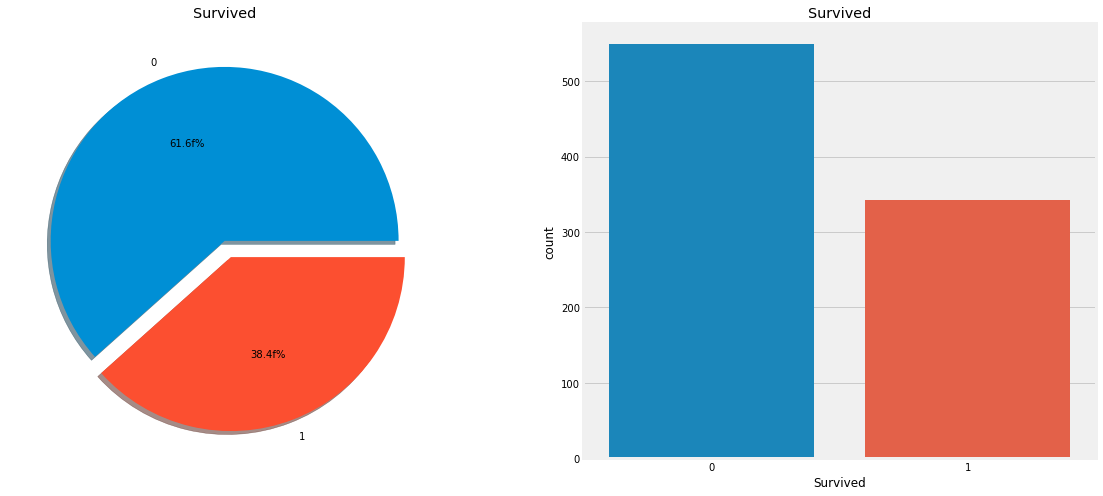

In [4]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data['Survived'].value_counts().plot.pie(explode=[0, 0.1],
                                         autopct='%1.1ff%%',
                                         ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')

plt.show()

> 생존 o: 38.41% -> 꽤나 `balanced data`
> - 각 feature에 따른 생존률을 확인하기 전 데이터 타입부터 이해하기

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2. Types of Features
#### Categorical Features
- Sex, Embarked

#### Ordinal Features
- Pclass

#### Continous Feature
- Age

### 1.1 Analysing the Features
### Sex (Categorical)

In [6]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

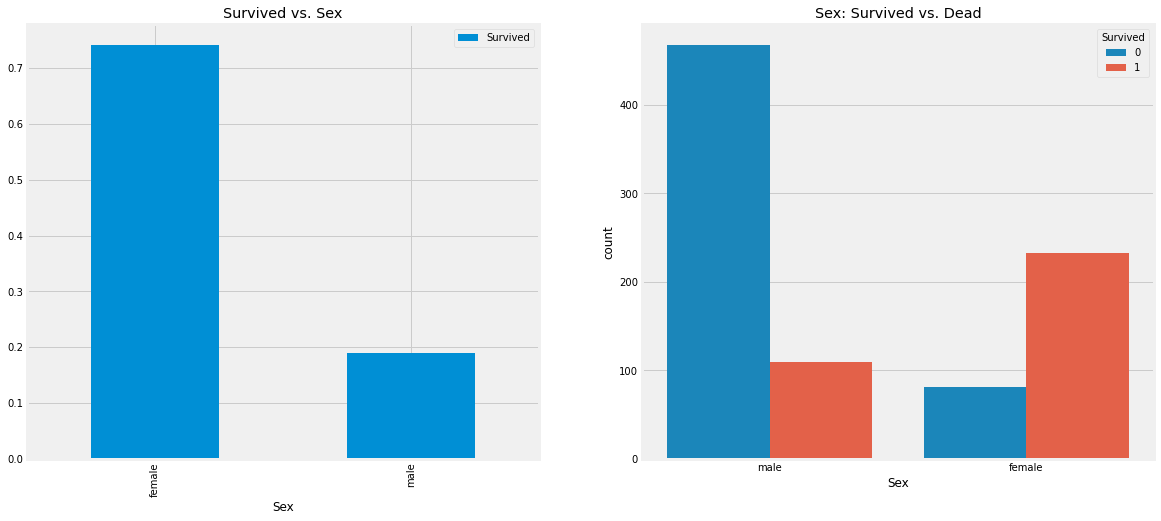

In [7]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs. Sex')

sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex: Survived vs. Dead')

plt.show()

> - 여자의 생존률이 굉장히 높음: `Sex`라는 feature이 모델에 중요한 변수처럼 보인다.

### Pclass (Ordinal)

In [8]:
pd.crosstab(data['Pclass'], data['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


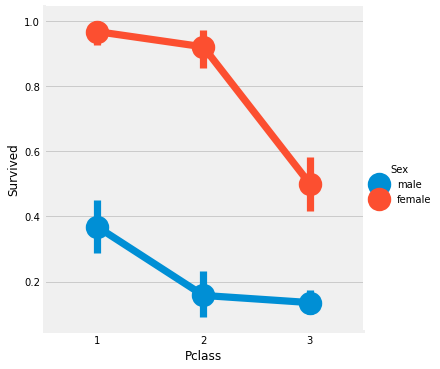

In [9]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)
plt.show()

**FactorPlot**: 범주형 데이터를 쉽게 분리해 그릴 수 있음
> - Pclass1의 여자가 거의 95%

### Age (Continuous)

In [11]:
print('Oldest Passenger was of: ', data['Age'].max(), 'Years')
print('Youngest Passenger was of: ', data['Age'].min(), 'Years')
print('Average Age on the ship: ', data['Age'].mean(), 'Years')

Oldest Passenger was of:  80.0 Years
Youngest Passenger was of:  0.42 Years
Average Age on the ship:  29.69911764705882 Years


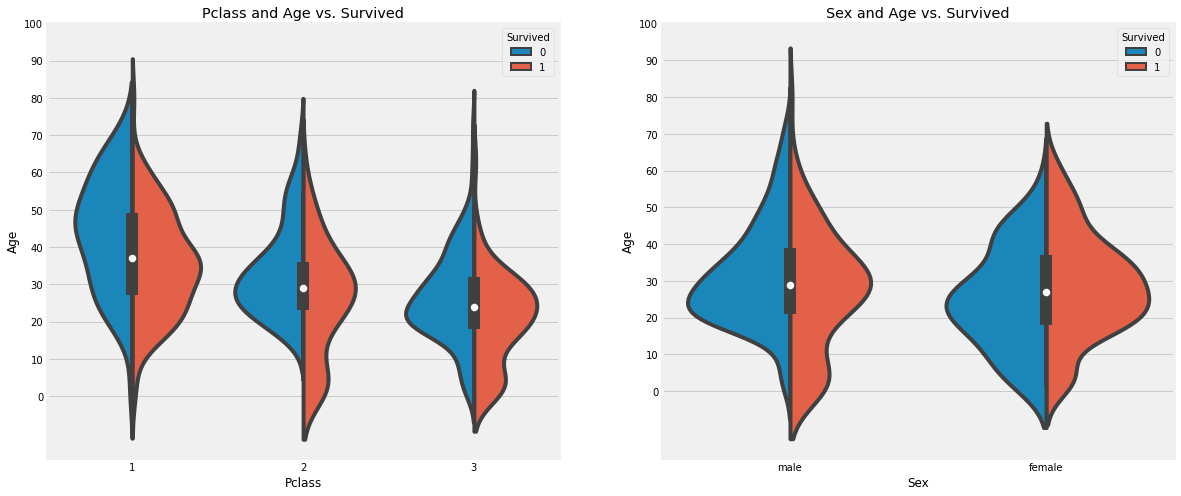

In [13]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.violinplot('Pclass', 'Age', hue='Survived', data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs. Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot('Sex', 'Age', hue='Survived', data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs. Survived')
ax[1].set_yticks(range(0, 110, 10))

plt.show()

> - Pclass를 보면 age 10 아래 아이들의 생존률이 꽤 높다.
> - Pclass 1에서 여자의 생존률이 20-50세에 높음
> - 남자는 나이가 들수록 생존률이 낮아짐

### Age Null Data
- NaN을 단순히 평균으로 채워버리면 4살 아이와 29살에게 같은 나이를 부여함이 되는데 옳지 않다.
- `.`을 기준으로 Salutations 추출하기

In [14]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
data['Initial'] = 0
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.') # extrcat Salutations

In [16]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [19]:
pd.crosstab(data['Initial'], data['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


> `Mlle`, `Mmme`과 같은 Initial은 오타처럼 보인다.
> - replace하기

In [20]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [21]:
data.groupby('Initial')['Age'].mean() # average age by Initials

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

### Filling NaN Ages

In [26]:
data.loc[(data.Age.isnull()) & (data.Initial=='Mr'), 'Age'] = 33
data.loc[(data.Age.isnull()) & (data.Initial=='Master'), 'Age'] = 5
data.loc[(data.Age.isnull()) & (data.Initial=='Miss'), 'Age'] = 22
data.loc[(data.Age.isnull()) & (data.Initial=='Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull()) & (data.Initial=='Other'), 'Age'] = 46

In [27]:
data.Age.isnull().any() # no null left

False

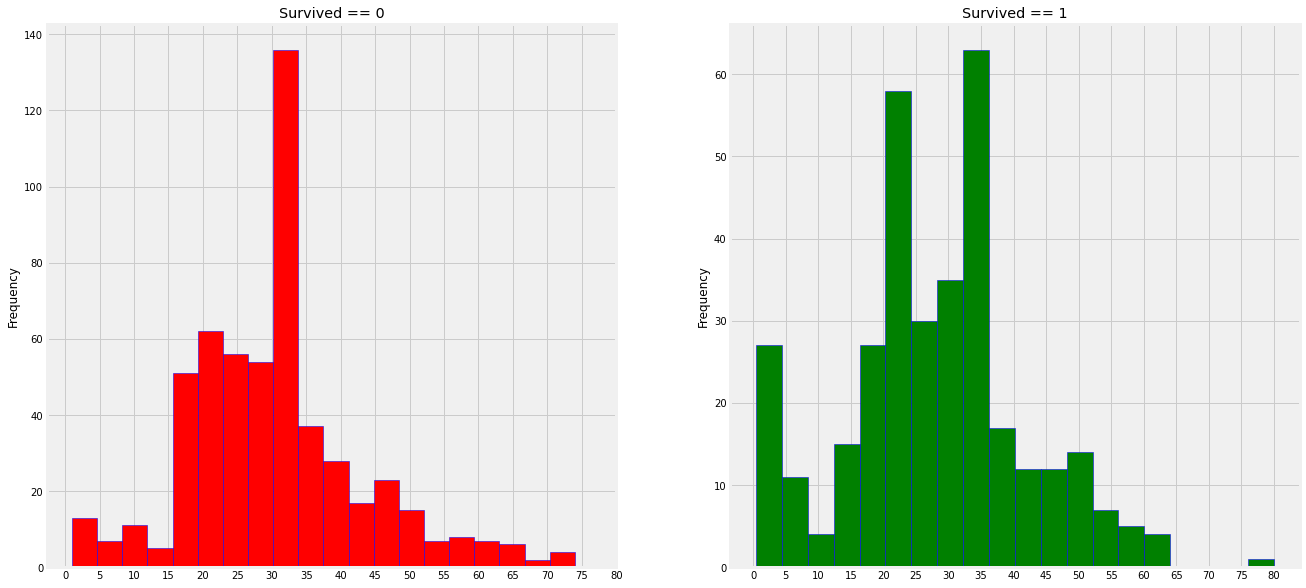

In [36]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))
data[data['Survived'] == 0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='b', color='r')
ax[0].set_title('Survived == 0')
x1 = list(range(0, 85, 5)) # 굳이 list로 묶어주는 이유는?
# x1 = range(0, 85, 5)
ax[0].set_xticks(x1)

data[data['Survived'] == 1].Age.plot.hist(ax=ax[1], bins=20, edgecolor='b', color='g')
ax[1].set_title('Survived == 1')
x2 = list(range(0, 85, 5))
ax[1].set_xticks(x2)

plt.show()

> - 5살 이하의 생존률이 높다.
> - 탑승자 중 가장 연장자(80세)는 생존자
> - 최대 사망자 수는 30~40세에 가장 많다.

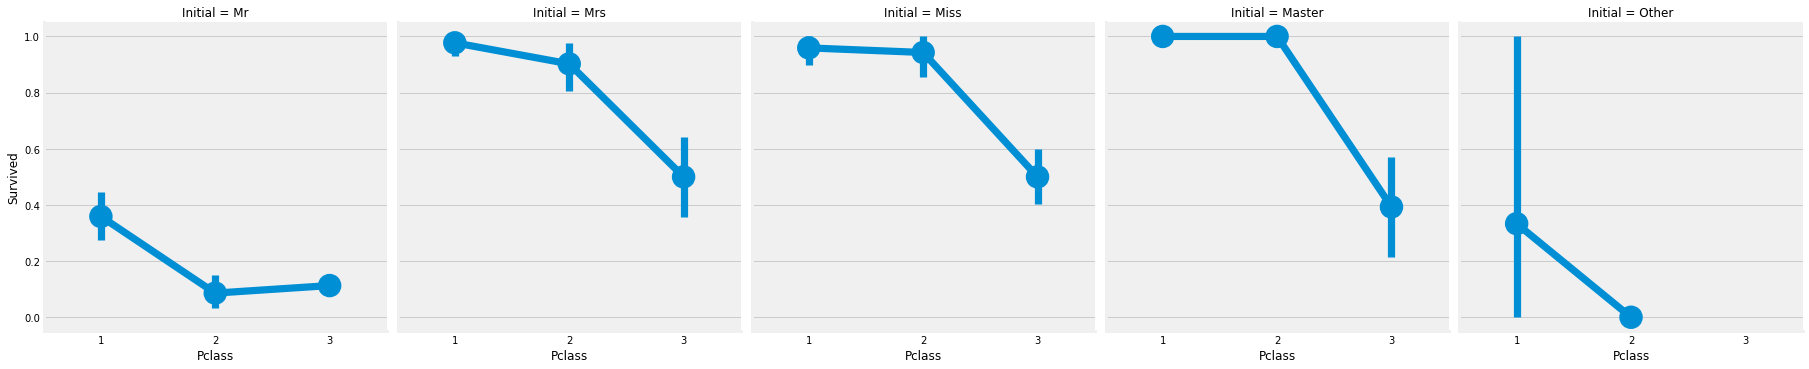

In [41]:
sns.factorplot('Pclass', 'Survived', col='Initial', data=data)
plt.show()

> - Mrs. Miss, Master(5)에서 생존률이 높은 것을 봐서 여자와 아이의 생존이 우선시된다.

### Embarked (Categorical)

In [49]:
pd.crosstab([data.Embarked, data.Pclass],[data.Sex, data.Survived], margins=True).style.background_gradient(cmap='summer_r')

In [54]:
pd.crosstab(data['Embarked'], data['Survived']).style.background_gradient(cmap='summer_r')

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


### Change for Survival by Port of Embarkation
- `gcf()`: 이미 생성된 figure를 대상으로 멤버 함수 호출하기

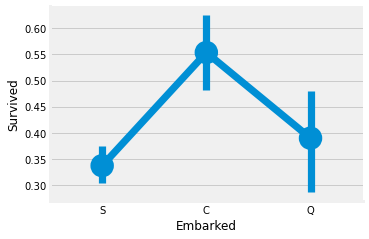

In [56]:
sns.factorplot('Embarked', 'Survived', data=data)
fig = plt.gcf()
fig.set_size_inches(5, 3)
plt.show()

> `C` 항구의 생존률이 0.55 가량으로 가장 높고, `S`가 가장 낮다.

Text(0.5, 1.0, 'Embarked vs. Pclass')

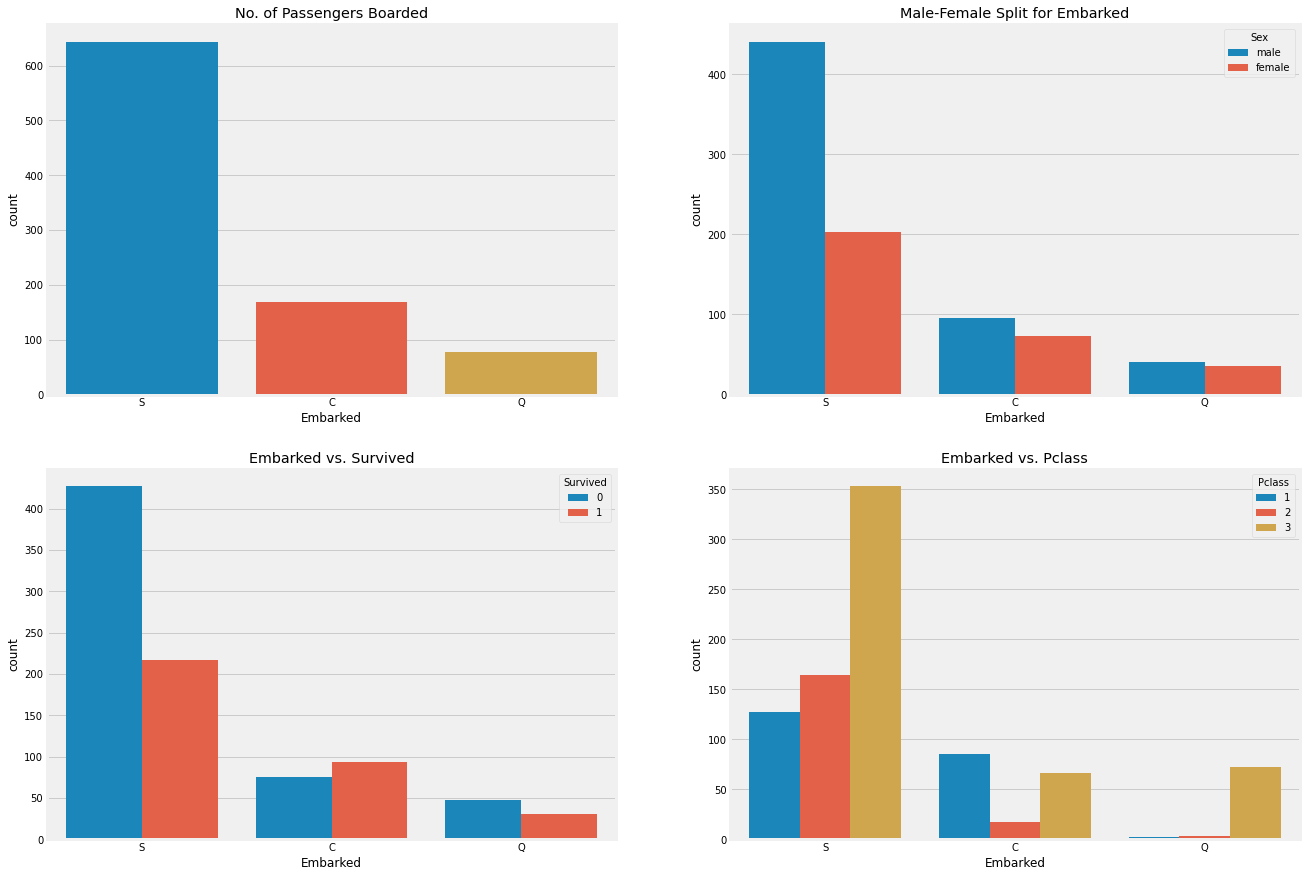

In [61]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))
sns.countplot('Embarked', data=data, ax=ax[0, 0])
ax[0, 0].set_title('No. of Passengers Boarded')

sns.countplot('Embarked', hue='Sex', data=data, ax=ax[0, 1])
ax[0, 1].set_title('Male-Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=data, ax=ax[1, 0])
ax[1, 0].set_title('Embarked vs. Survived')

sns.countplot('Embarked', hue='Pclass', data=data, ax=ax[1, 1])
ax[1, 1].set_title('Embarked vs. Pclass')

> - 항구 `S`의 탑승자 수가 가장 많은데, 대부분 Pclass3 탑승자라고 판단된다.
> - `C`의 생존률이 가장 높아 보인다.
> - `S` 항구의 사망률이 가장 높은 것은 Pclass3의 대부분이 사망했기 때문
> - `Q`항구는 거의 대부분이 Pclass3 탑승자였다.

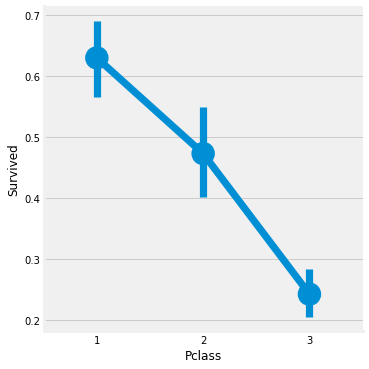

In [64]:
# Pclass별 사망자수
sns.factorplot('Pclass', 'Survived', data=data)